In [1]:


import os


In [2]:

d = '../Logs/'
daily_folders = sorted([os.path.join(d, o) for o in os.listdir(d) 
                    if os.path.isdir(os.path.join(d,o))])

daily_folders

['../Logs/18-05-29',
 '../Logs/18-05-30',
 '../Logs/18-05-31',
 '../Logs/18-06-01',
 '../Logs/18-06-02',
 '../Logs/18-06-03',
 '../Logs/18-06-04',
 '../Logs/18-06-05',
 '../Logs/18-06-06',
 '../Logs/18-06-07',
 '../Logs/18-06-08',
 '../Logs/18-06-09',
 '../Logs/18-06-10',
 '../Logs/18-06-11',
 '../Logs/18-06-12',
 '../Logs/18-06-13',
 '../Logs/18-06-14',
 '../Logs/18-06-15',
 '../Logs/18-06-16',
 '../Logs/18-06-17',
 '../Logs/18-06-18',
 '../Logs/18-06-19',
 '../Logs/18-06-20',
 '../Logs/18-06-21',
 '../Logs/18-06-22',
 '../Logs/18-06-23',
 '../Logs/18-06-24',
 '../Logs/18-06-25',
 '../Logs/18-06-26',
 '../Logs/18-06-27',
 '../Logs/18-06-28',
 '../Logs/18-06-29',
 '../Logs/18-06-30',
 '../Logs/18-07-01',
 '../Logs/18-07-02',
 '../Logs/18-07-03',
 '../Logs/18-07-04',
 '../Logs/18-07-05',
 '../Logs/18-07-06',
 '../Logs/18-07-07',
 '../Logs/18-07-08',
 '../Logs/18-07-09',
 '../Logs/18-07-10',
 '../Logs/18-07-11',
 '../Logs/18-07-12',
 '../Logs/18-07-13',
 '../Logs/18-07-14',
 '../Logs/18-

In [3]:
#only one file in the folders

ch6_files = sorted([os.path.join(f,o) for f in daily_folders
                   for o in os.listdir(f) 
                   if o.startswith('CH6 T')])
ch6_files

['../Logs/18-05-30/CH6 T 18-05-30.log',
 '../Logs/18-05-31/CH6 T 18-05-31.log',
 '../Logs/18-06-01/CH6 T 18-06-01.log',
 '../Logs/18-06-02/CH6 T 18-06-02.log',
 '../Logs/18-06-03/CH6 T 18-06-03.log',
 '../Logs/18-06-04/CH6 T 18-06-04.log',
 '../Logs/18-06-05/CH6 T 18-06-05.log',
 '../Logs/18-06-06/CH6 T 18-06-06.log',
 '../Logs/18-06-07/CH6 T 18-06-07.log',
 '../Logs/18-06-08/CH6 T 18-06-08.log',
 '../Logs/18-06-09/CH6 T 18-06-09.log',
 '../Logs/18-06-10/CH6 T 18-06-10.log',
 '../Logs/18-06-11/CH6 T 18-06-11.log',
 '../Logs/18-06-12/CH6 T 18-06-12.log',
 '../Logs/18-06-13/CH6 T 18-06-13.log',
 '../Logs/18-06-14/CH6 T 18-06-14.log',
 '../Logs/18-06-15/CH6 T 18-06-15.log',
 '../Logs/18-06-16/CH6 T 18-06-16.log',
 '../Logs/18-06-17/CH6 T 18-06-17.log',
 '../Logs/18-06-18/CH6 T 18-06-18.log',
 '../Logs/18-06-19/CH6 T 18-06-19.log',
 '../Logs/18-06-20/CH6 T 18-06-20.log',
 '../Logs/18-06-21/CH6 T 18-06-21.log',
 '../Logs/18-06-22/CH6 T 18-06-22.log',
 '../Logs/18-06-23/CH6 T 18-06-23.log',


In [4]:
import datetime, time
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
dates,Ts = [],[]

for f in ch6_files:
    print('.',end='')
    with open(f,'r') as fi:
        for line in fi.readlines():
            parts = line.split(',')
            if len(parts) == 3:
                #parser.parse(  )
                #datetime.datetime.fromisoformat( )
                dates.append( datetime.datetime.strptime(parts[0][1:] + 'T' + parts[1],"%d-%m-%yT%H:%M:%S") )
                
                Ts.append(float(parts[2]))

..............................................................................................................................................................................................................

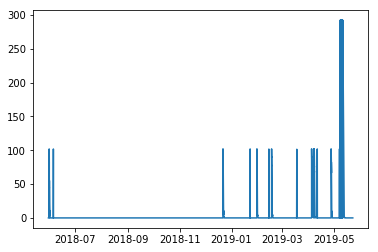

In [8]:
plt.plot_date(dates,Ts,'-')

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame({'dt':dates,'T':Ts})

In [11]:
df['epoch'] = df['dt'].apply(lambda x: x.timestamp() )
min_t = np.min(df['epoch'])
df['h'] = (df['epoch']-min_t)/3600

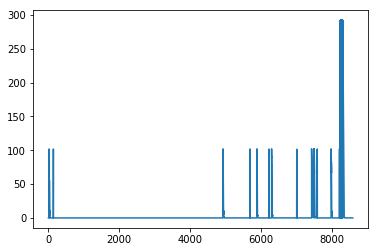

In [12]:

plt.plot(df['h'],df['T'])

In [13]:
import json

In [14]:
def save_json(filename,obj):
    with open(filename,'w+') as f:
        json.dump(obj,f)

/home/sarsby/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


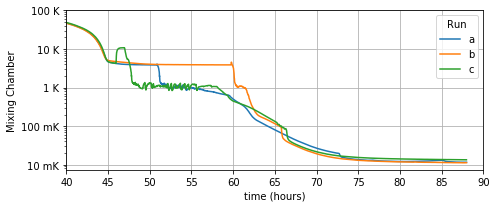

In [47]:
#starts = [4890,5855,6269,7398,8298]

starts = [5854.5,6269,4897]
plt.figure(figsize=(7,3),)
runsletters = ['a','b','c']
r = {}
for start,label in zip(starts,runsletters):
    length = 90
    offset = 40
    tdf=df[df['h'] > start+offset]
    tdf=tdf[tdf['h'] < start-2+length]
    newmin= np.min(tdf['h'])-offset
    r[label] = {
        'h': list(tdf['h']-newmin),
        'T': list(tdf['T']),
    }
    plt.semilogy(tdf['h']-newmin,tdf['T'],label=label)

save_json('./50tobasekelvinpagani.json',r)
plt.legend(title='Run')
plt.yscale('log')
plt.xlabel('time (hours)')
plt.ylabel('Mixing Chamber')
plt.xticks(range(offset,length+1,5))
plt.grid(True)
plt.ylim(0,80)
plt.xlim(offset,length)
plt.yticks([0.01,0.1,1,10,100],['10 mK','100 mK','1 K','10 K','100 K'])
plt.tight_layout()

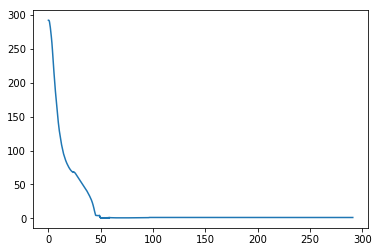

In [132]:
start = 8298
length = 1000
tdf=df[df['h'] > start]
tdf=tdf[tdf['h'] < start+length]
newmin= np.min(tdf['h'])

plt.plot(tdf['h']-newmin,tdf['T'])